C:\Users\Joshua\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass input=['PRE-COOKED PARBOILED LONG GRAIN BROWN RICE.', 'ENRICHED PRECOOKED LONG GRAIN WHITE RICE (ENRICHED WITH NIACIN, IRON [FERRIC ORTHOPHOSPHATE], THIAMIN [THIAMIN MONONITRATE], AND FOLIC ACID).', 'ENRICHED PRECOOKED LONG GRAIN WHITE RICE (ENRICHED WITH NIACIN, IRON (FERRIC ORTHOPHOSPHATE), THIAMIN [THIAMIN MONONITRATE), AND FOLIC ACID).', 'RIZ BASMATI RICE.', 'ORGANIC BROWN AND RED RICE', 'ENRICHED LONG GRAIN RICE [RICE, NIACIN, IRON (FERRIC ORTHOPHOSPHATE), THIAMIN (THIAMIN MONONITRATE), FOLIC ACID].', 'RICE (JASMINE RICE), SEASONINGS (GARLIC, SALT, DEXTROSE, RED BELL PEPPER, SHALLOT POWDER, SUGAR, HYDROLYZED VEGETABLE PROTEIN (SOYBEANS, MAIZE, MALTODEXTRIN) SILICON DIOXIDE (TO PREVENT CAKING), TURMERIC POWDER, CHILI OLEORESIN). COCONUT MILK POWDER (COCONUT, GLUCOSE SYRUP (TAPIOCA), MONO AND DIGLYCERIDE (AN EMULSIFIER), DIPOTASSIUM PHOSPHATE, SILICON DIOXIDE (TO PREVENT CAKING)),BASIL (B

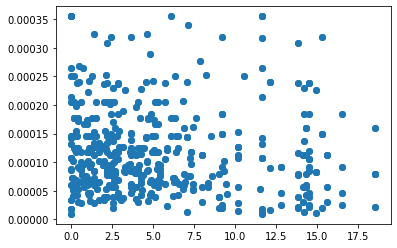

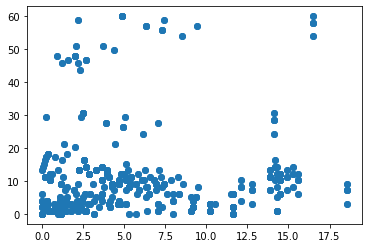

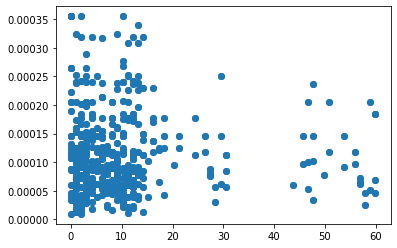

(-0.14393757250990769, 1.4594780628599901e-05)
(-0.09285947278438708, 0.005304464140235074)
(0.12627931232826967, 0.00014567470464173086)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



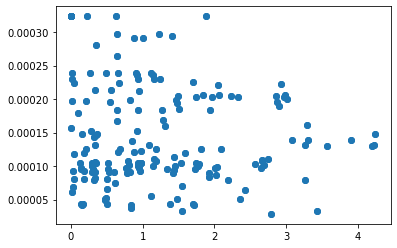

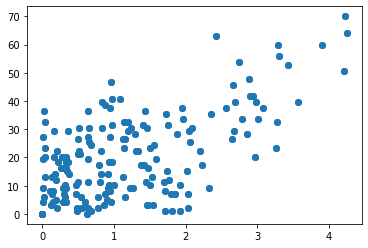

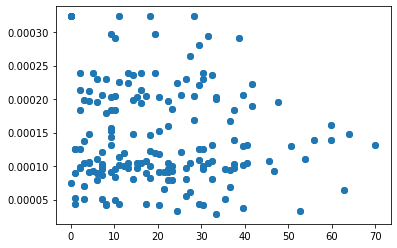

(-0.139674022571678, 0.007868940775601659)
(-0.1726791834020814, 0.0009866496917512566)
(0.6258286969684774, 1.2018777622649604e-40)


C:\Users\Joshua\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass input=['PASTEURIZED CULTURED CREAM, CANE SUGAR, MADAGASCAR VANILLA EXTRACT, VANILLA BEAN POWDER.', 'PASTEURIZED CULTURED CREAM, CITRIC ACID, AND VITAMIN C (TO MAINTAIN FRESHNESS).', 'CULTURED CREAM.', 'GRADE A CALTURED PASTEURIZED SKIM MILK, CREAM AND ULTRAFILTERED SKIM MILK*, NATURAL FLAVOR, VITAMIN A PALMITATE, ENZYMES.', 'CULTURED CREAM.', 'GRADE A MILK AND CREAM, LESS THAN 2% OF: MODIFIED FOOD STARCH, KOSHER GELATIN, GUAR GUM, MONO & DIGLYCERIDES, SODIUM PHOSPHATE, POTASSIUM SORBATE (TO MAINTAIN FRESHNESS) AND CITRIC ACID.', 'CULTURED SOUR CREAM (SKIM MILK, CREAM, CORN STARCH MODIFIED, GUAR GUM, SODIUM PHOSPHATE, CARRAGEENAN, SODIUM CITRATE, LOCUST BEAN GUM, CULTURES), POTASSIUM SORBATE (PRESERVATIVE).', 'CULTURED PASTEURIZED GRADE A CREAM, ENZYMES.', 'GRADE A MILK AND CREAM, LESS THAN 2% OF: MODIFIED FOOD STARCH, KOSHER GELATIN, GUAR GUM, MONO & DIGLYCERIDES, SODIUM PHOSPHATE, POTASSIUM

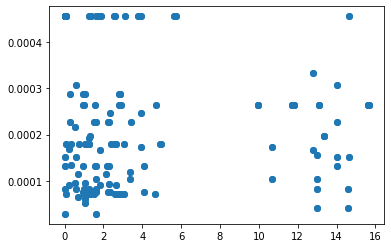

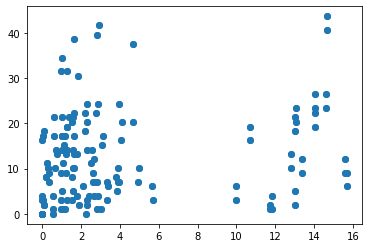

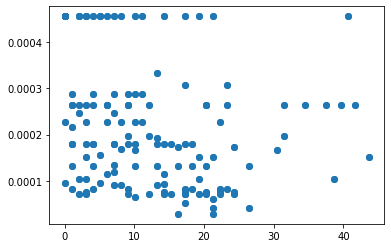

(-0.011040967817553492, 0.8517479043545362)
(-0.24571101498731474, 2.400924285285515e-05)
(0.19723105084974557, 0.000747397219609793)


<Figure size 432x288 with 0 Axes>

In [3]:
#Packages Used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import readability
import time
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
import itertools
from itertools import combinations,chain,product,permutations

""" The following function performs a cosine similarity analysis of a subset 'subset' of the FDC Food Products 
    Database () saved to path as 'branded_food.csv' (default file name)"""

def cosine_similarity_analysis(filename, subset):
    FDC_query = "".join(("branded_food_category == '",subset,"'"))
    delim_subset = subset.replace(" ","-")
    #Step 1: Import Food Data Central Food Products Database 
    FoodDataCentral = pd.read_csv(filename, low_memory = False)

    #Generate list of branded food categories (Optional, uncomment following three lines to view possible branded food categories for analysis)
    #grouped_counts = pd.DataFrame(FoodDataCentral.groupby(['branded_food_category'])['branded_food_category'].count())
    #grouped_counts.columns = ["bfc_count"]
    #grouped_counts.sort_values(by = "bfc_count", ascending = False)[50:70]

    #Step 2: Get Database subset by branded food category ('Rice' in this case) and remove rows with empty values or only non-words 
    FoodDataCentral = FoodDataCentral.query(FDC_query)
    FoodDataCentral = FoodDataCentral.dropna(subset = ['ingredients'])
    FoodDataCentral = FoodDataCentral[FoodDataCentral["ingredients"] != "---"]
    FoodDataCentral = FoodDataCentral[FoodDataCentral["ingredients"] != ","]

    #Step 3: Calculate and get Readability Scores for FoodData Central ingredient lists
    readability_scores = []
    for index, row in FoodDataCentral.iterrows():
        #num_words = len(word_tokenize(row['ingredients']))
        if pd.isna(row["ingredients"]) or row["ingredients"] in ["---"]:
            curr_record = (row['fdc_id'], row['gtin_upc'], pd.NA,pd.NA)
            readability_scores.append(curr_record)

        else:
            """Readability.getmeasures() automatically tokenizes the input by default and returns a set of readability measures. In this case,
            we are getting a specific measure from the set (flesch-kincaid) """
            curr_record = (row['fdc_id'], row['gtin_upc'], row['branded_food_category'],readability.getmeasures(row["ingredients"])['readability grades']['Kincaid'],
                           readability.getmeasures(row["ingredients"])['readability grades']['FleschReadingEase'],
                           readability.getmeasures(row["ingredients"])['readability grades']['DaleChallIndex'],
                           readability.getmeasures(row["ingredients"])['sentence info']['words'],
                           readability.getmeasures(row["ingredients"])['sentence info']['complex_words_dc'])
            readability_scores.append(curr_record)


    readScores_FDC = pd.DataFrame(data = readability_scores, columns = ["fdc_id", "gtin_upc","branded_food_category",
                                                                        "Kincaid_Score","FleschReadingEase","DaleChallIndex",
                                                                        "num_words","complex_words_dc"])

    readScores_FDC.to_csv("".join((delim_subset,"_FoodData_Central_Readability.csv")), sep=",")
    for value in readScores_FDC.columns.values:
        FoodDataCentral[value] = readScores_FDC[value]


    #Step 4: Generate Matrix of pairwise differences for Flesch Reading Ease
    difference_matrix_fl = [[abs(y - x) for x in FoodDataCentral["FleschReadingEase"]] for y in FoodDataCentral["FleschReadingEase"]]
    difference_matrix_fl = list(chain(*difference_matrix_fl))

    #Step 5: Create Difference Matrix- Dale-Chall Index
    difference_matrix_dc = [[abs(y - x) for x in FoodDataCentral["DaleChallIndex"]] for y in FoodDataCentral["DaleChallIndex"]]
    difference_matrix_dc = list(chain(*difference_matrix_dc))

    #Step 6: Convert FDC IDs from float to string
    FoodDataCentral["fdc_id"] = FoodDataCentral["fdc_id"].astype("str")

    #Get FDC indices for referencing matrices (Optional)
    fdc_indices = dict(enumerate(FoodDataCentral["fdc_id"]))

    #Step 7: Create list of FDC ID pairs (w/repeats)
    fdcID_pairs = list(itertools.product(FoodDataCentral["fdc_id"],repeat=2))

    #Step 8: Create and fit word count vectorizer model to ingredient lists 

    #Gather list of ingredient lists from dataset
    documents = list(FoodDataCentral['ingredients'].values) 

    #Create Count Vectorizer Model
    count_vectorizer = CountVectorizer(documents, stop_words='english')

    #Fit model to ingredient list
    count_vectorizer.fit(documents)

    #Step 9: Transform model to array
    documents_1 = list(FoodDataCentral['ingredients'].values) 
    vectors = count_vectorizer.transform(documents_1).toarray()
    np.save("".join((delim_subset,"_Vectors_Batch_3_test")),vectors)

    #Step 10: Calculate cosine similarity of ingredient lists
    cos_sim = cosine_similarity(vectors)
    cos_sim_flat = list(cos_sim)
    cos_sim_flat = list(chain(*cos_sim_flat))
    cos_sim_flat = cos_sim_flat / np.linalg.norm(cos_sim_flat)

    #Step 11: Create Dataframe with readability differences and cosine similarities
    analysis_set = pd.DataFrame(fdcID_pairs, columns = ["fdc_id 1","FDC_id 2"])
    analysis_set["DaleChallDiff"] = difference_matrix_dc
    analysis_set["Cosine_similarity"] = cos_sim_flat
    analysis_set["Flesch_diff"] = difference_matrix_fl
    analysis_set["Subset"] = subset

    #Step 12: Prepare dataframe for plot generation and Summary Statistics
    analysis_set.dropna(inplace=True)
    analysis_set.replace([np.inf, -np.inf], np.nan, inplace=True)
    analysis_set.dropna(inplace=True)
    analysis_set.to_csv("".join((delim_subset,"_Readability_and_CosineSimilarity_scores.csv")))

    #Step 13: Get Scatter Plot- Dale Chall diff vs Cosine Similarity
    plt.scatter(analysis_set["DaleChallDiff"], analysis_set["Cosine_similarity"])
    plt.show()
    plt.savefig("".join((delim_subset,"_DaleChall_vs_CosineSimilarity.png")))

    #Step 14: Get Scatter Plot- Dale Chall diff vs Flesch diff
    plt.scatter(analysis_set["DaleChallDiff"], analysis_set["Flesch_diff"])
    plt.show()
    plt.savefig("".join((delim_subset,"_DaleChall_vs_Flesch.png")))

    #Step 15: Get Scatter Plot- Flesch diff vs Cosine Similarity
    plt.scatter(analysis_set["Flesch_diff"], analysis_set["Cosine_similarity"])
    plt.show()
    plt.savefig("".join((delim_subset,"_Flesch_vs_CosineSimilarity.png")))

    #Step 16: Get Pearson Correlations
    print(pearsonr(analysis_set["DaleChallDiff"], analysis_set["Cosine_similarity"]))
    print(pearsonr(analysis_set["Flesch_diff"], analysis_set["Cosine_similarity"]))
    print(pearsonr(analysis_set["DaleChallDiff"], analysis_set["Flesch_diff"]))
    
    return analysis_set

def main():
    cosine_similarity_analysis("branded_food.csv", "Rice")
    cosine_similarity_analysis("branded_food.csv", "Pasta Dinners")
    cosine_similarity_analysis("branded_food.csv", "Cream")

if __name__ == "__main__":
    main()